In [1]:
import zipfile

# Nama file zip yang sudah diunggah
filezip = "mobil_x_motor.zip"

# Ekstrak file zip
with zipfile.ZipFile(filezip, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import layers


In [3]:
from PIL import Image
import os

# Mendapatkan daftar file dari direktori gambar
image_dir = 'train/mobil'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'train/motor'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'test/mobil'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'test/motor'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

Found 1199 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [5]:
model = tf.keras.Sequential([
    
    layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Flatten(),

    layers.Dense(units=4096, activation="relu"),
    layers.Dense(units=4096, activation="relu"),
    layers.Dense(units=2, activation="softmax")
])

In [6]:

from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16.h5",monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=False, save_freq='epoch') # simpan setiap epoch
early = EarlyStopping(monitor='val_accuracy',min_delta=0, patience=20,verbose=1)

In [9]:
history = model.fit(traindata, steps_per_epoch=10, validation_data=testdata, validation_steps=10, epochs=50, callbacks=[checkpoint, early])

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1304.8322 - accuracy: 0.4587
Epoch 1: val_accuracy improved from -inf to 0.42000, saving model to vgg16.h5
10/10 [==============================] - 50s 3s/step - loss: 1304.8322 - accuracy: 0.4587 - val_loss: 0.6961 - val_accuracy: 0.4200
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.7558 - accuracy: 0.4688
Epoch 2: val_accuracy improved from 0.42000 to 0.50000, saving model to vgg16.h5
10/10 [==============================] - 23s 3s/step - loss: 0.7558 - accuracy: 0.4688 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5094
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 5s 518ms/step - loss: 0.6895 - accuracy: 0.5094 - val_loss: 0.7282 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.7062 - accuracy: 0.5000
Epoch 4: val_accura

In [10]:
model.save('vgg16.h5')

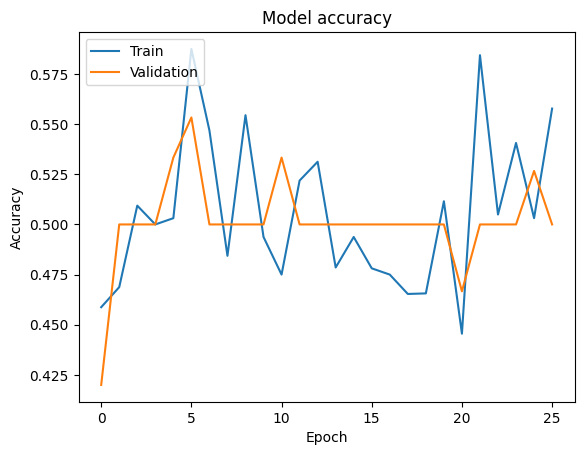

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
print("Last Accuracy:", history.history['accuracy'][-1])

Last Accuracy: 0.5577557682991028


1/1 [==============================] - 0s 156ms/step
[[0.5271657  0.47283423]]
Mobil
akurasi : 52.72 %


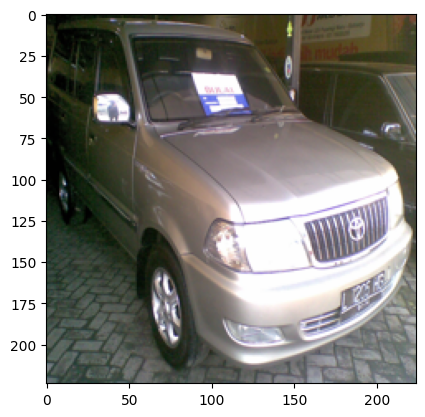

In [19]:
import matplotlib.pyplot as plt

img = Image.open("Kijang.jpg")
img = img.resize((224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("vgg16.h5")

output = saved_model.predict(img)
print(output)
if output[0][0] > output[0][1]:
    print("Mobil")
    print("akurasi :",round(output[0][0]*100, 2),"%")
else:
    print('Motor')
    print("akurasi :",round(output[0][1]*100,2),"%")